# Capstone Project: Time Series Analysis on Solar and Wind Production in the United States

By: Sami Boutros

#### Introduction:

This report seeks to analyze the United States Energy Information Administration’s (EIA) published data of electricity production from renewable resources, specifically solar and wind production, to determine if federal incentive programs for renewable energy project investment have had a statistically significant impact on renewable energy production.  Also outlined in this report is to determine if there was an increase or decrease in the overall installed cost of the technologies and whether those changes have contributed to the adoption of wind and solar technologies into the United States energy portfolio.  The policies reviewed by this report include the 2005 Energy Policy Act (Bush Jr. (R)), the 2007 Energy Independence and Securities Act (Bush Jr. (R)), and the 2009 American Recovery and Reinvestment Act (Obama (D)).

In an attempt to determine whether federal programs have shown enough incentive for continued investment, this report analyzes how much solar and wind production has grown since the ratification of the above named federal policies.  The analysis within the report also attempts to predict solar and wind production in the years beyond what is available in the EIA’s opens-source datasets.  In combination with the production data and the policy ratification dates, the report provides the cost of installation for both technologies.

Those interested in this report should be the federal government and its various agencies, private investors in the energy industry, and entrepreneurs interested in the energy sector.  This report would inform the federal government about determining which incentive programs assisted or had no effect on renewable energy electricity production in the United States.  This analysis would also inform private investors about potential growth opportunities or lack thereof in the renewable energy industry based on predictive models of production and lower installed cost of the technologies.  The investigation about the continued impacts these policies have had and will have in the future can inform potential entrepreneurs about potential growth in funding or lack thereof in this solar and wind energy sector.

#### Data:
The EIA open-source dataset provides the production rates of all energy technologies but the ones focused on in this report is wind and solar.  The production data was downloaded from the Primary Energy Overview dashboard.  The installation costs for wind was acquired from Berkeley Lab: Wind Technologies Market Report, specifically Figure 46. The installation cost data for solar was obtained from a combination of multiple sources including: (INSERT SOURCE)

Particular variables of significance would be the dates in which the above-mentioned policies were enacted.  The dates for when the laws were implimented are August 8, 2005 for the Energy Policy Act of 2005, December 19, 2007 for the 2007 Energy Independence and Securities Act, and February 17, 2009 for the 2009 American Recovery and Reinvestment Act.  These dates were instered as indicator columns within the dataframe.

To utilize the multiplicative module of seasonal_decompose, there cannot be any production values that are negative or zero.  Below is the parced dataset that only contains consecutive months in which both solar and wind prodction data are non-zero and positive.  


#### Objective:
Compare and contrast monthly production using graphical trend lines of solar and wind energy production before and after policy ratification. Also, attempt to predict production levels in future months.

In [30]:
'''Import packages, read the EIA dataset, and wrangle it to isolate wind and solar production data.'''

import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_excel('Table_1.2_Primary_Energy_Production_by_Source.xlsx', sheet_name='Monthly Data', header=None)
df = df.drop(df.iloc[:,0:10])
df = df.drop([11])
df = df.drop(columns = range(1,9))
df = df.drop(columns = range(11,14))
df.columns = df.iloc[0]
df = df.drop(10)
df['Wind Energy Production'] = df['Wind Energy Production'].apply(pd.to_numeric, errors='coerce')
df['Solar Energy Production'] = df['Solar Energy Production'].apply(pd.to_numeric, errors='coerce')

In [31]:
'''Create new column aggregating the solar and wind production values and drop 'NA' values where productions rates
were not documented by the agency.  Reset the index as the Month as a datetime object.'''

df['Total Solar and Wind Production'] = (df['Solar Energy Production'] + df['Wind Energy Production'])
df['Total Solar and Wind Production'] = df['Total Solar and Wind Production'].apply(pd.to_numeric, errors='coerce')
df = df.reset_index(drop = True)
df['Month'] = pd.to_datetime(df['Month']).dt.date

In [32]:
'''Create datetime objects corresponding to the ratification of the above stated policies and indicate by booleans
whether production rates were documented before or after ratification of the polices.'''

epa5 = dt.datetime(2005, 8, 8).date()
eisa7 = dt.datetime(2007, 12, 19).date()
arra9 = dt.datetime(2009, 2, 17).date()
df['Energy Policy Act 2005'] = [0 if ele  < epa5 else 1 for ele in df['Month']]
df['2007 Energy Independence and Securities Act'] = [0 if ele  < eisa7 else 1 for ele in df['Month']]
df['American Recovery and Reinvestment Act'] = [0 if ele  < arra9 else 1 for ele in df['Month']]

In [33]:
'''Incorporate cost of wind in dollars per watt ($/W) by reading in dataset and changing the year to a datetime
object.'''

df['Cost of Wind ($/W)'] = 'NA'
cost_wind = pd.read_excel('2018_wtmr_data_file (Figure 46).xlsx', sheetname='Figure 46', header=None)
cost_wind = cost_wind.drop(cost_wind.index[:7])

for s in range(cost_wind[0].count()):
    cost_wind.iloc[s][0] = dt.datetime(cost_wind.iloc[s][0], 1 , 1).date()

cost_wind = cost_wind.reset_index(drop = True)

for t in range(df['Month'].count()):
    date = df['Month'][t].year
    for ot in range(cost_wind[0].count()):
        if date == cost_wind[0][ot].year:
            df['Cost of Wind ($/W)'][t] = (cost_wind[1][ot]/1000)

C:\Users\KendMann\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
'''Negative production values and zero (0) production values must be dropped from the dataset.'''

df = df.drop(range(0,253))
df = df.set_index('Month')
data = df
data.head()

10,Solar Energy Production,Wind Energy Production,Total Solar and Wind Production,Energy Policy Act 2005,2007 Energy Independence and Securities Act,American Recovery and Reinvestment Act,Cost of Wind ($/W)
Month,,,,,,,
1994-02-01,0.003849,0.001036,0.004885,0,0,0,2.03551
1994-03-01,0.005508,0.005639,0.011147,0,0,0,2.03551
1994-04-01,0.006003,0.004258,0.010261,0,0,0,2.03551
1994-05-01,0.006596,0.003798,0.010394,0,0,0,2.03551
1994-06-01,0.006718,0.003798,0.010516,0,0,0,2.03551


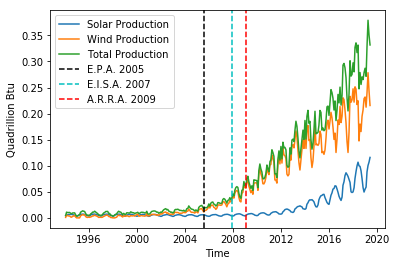

In [36]:
'''Plot all production columns with policy ratification dates.'''

solar = data['Solar Energy Production']
wind = data['Wind Energy Production']
total = data['Total Solar and Wind Production']
_ = plt.plot(solar, label='Solar Production')
_ = plt.plot(wind, label = 'Wind Production')
_ = plt.plot(total, label = 'Total Production')
_ = plt.axvline(x=epa5, color = 'k', linestyle = '--', label = 'E.P.A. 2005')
_ = plt.axvline(x=eisa7, color = 'c', linestyle = '--', label = 'E.I.S.A. 2007')
_ = plt.axvline(x=arra9, color = 'r', linestyle = '--', label = 'A.R.R.A. 2009')
plt.xlabel('Time')
plt.ylabel('Quadrillion Btu')
plt.legend()
plt.show()

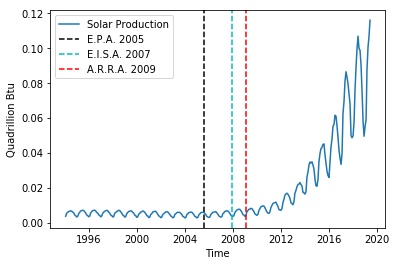

In [37]:
'''Plot solar production only with policy ratification dates.'''

_ = plt.plot(solar, label='Solar Production')
_ = plt.axvline(x=epa5, color = 'k', linestyle = '--', label = 'E.P.A. 2005')
_ = plt.axvline(x=eisa7, color = 'c', linestyle = '--', label = 'E.I.S.A. 2007')
_ = plt.axvline(x=arra9, color = 'r', linestyle = '--', label = 'A.R.R.A. 2009')
plt.xlabel('Time')
plt.ylabel('Quadrillion Btu')
plt.legend()
plt.show()

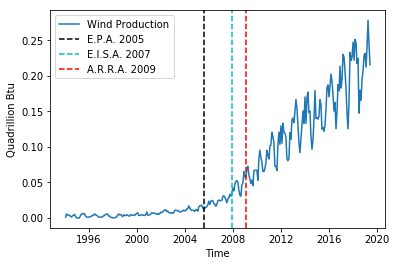

In [38]:
'''Plot wind production only with policy ratification dates.'''

_ = plt.plot(wind, label = 'Wind Production')
_ = plt.axvline(x=epa5, color = 'k', linestyle = '--', label = 'E.P.A. 2005')
_ = plt.axvline(x=eisa7, color = 'c', linestyle = '--', label = 'E.I.S.A. 2007')
_ = plt.axvline(x=arra9, color = 'r', linestyle = '--', label = 'A.R.R.A. 2009')
plt.xlabel('Time')
plt.ylabel('Quadrillion Btu')
plt.legend()
plt.show()

There seems to be a higher growth rate in wind production than in solar production between the August 8th, 2005 and December 19th, 2007.  Wind Energy over all has seen more growth in production when compared to solar production in terms of Btu.  Both appear to be experiencing exponential growth in production (higher highs and higher lows).

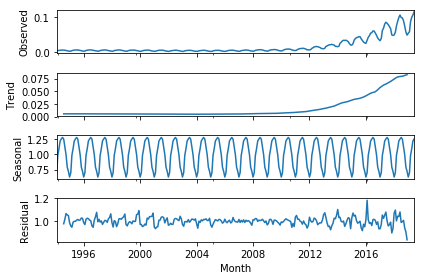

In [40]:
solar_result = seasonal_decompose(solar, model='multiplicative', freq=12)
solar_result.plot()
plt.show()

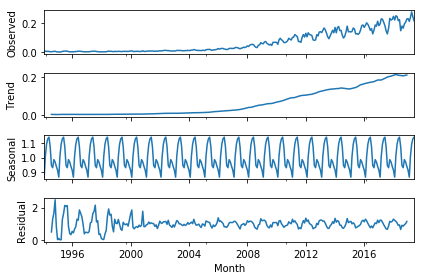

In [41]:
wind_result = seasonal_decompose(wind, model='multiplicative', freq=12)
wind_result.plot()
plt.show()